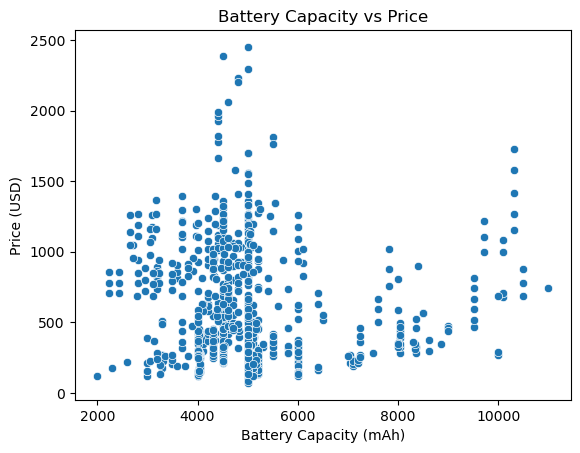

Correlation: -0.04


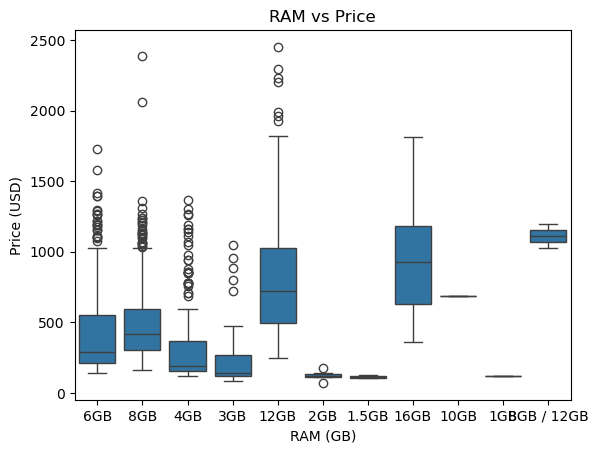

ANOVA test: p-value = 0.0000
Apple price variation:
Launched.Price.Pakistan.PKR    77274.850316
Launched.Price.India.INR       29509.851082
Launched.Price.China.CNY        1780.705014
Launched.Price.USA.USD           247.896867
Launched.Price.Dubai.AED         867.027994
dtype: float64
Category      Budget  Mid-range  Premium
Company.Name                            
Apple            1.0        6.0     90.0
Google           NaN       11.0     10.0
Honor           33.0       35.0     23.0
Huawei           NaN       17.0     25.0
Infinix         43.0       13.0      NaN
Lenovo          10.0        5.0      NaN
Motorola        27.0       29.0      6.0
Nokia           10.0        NaN      NaN
OnePlus          9.0       29.0     15.0
Oppo            41.0       66.0     22.0
POCO            19.0       11.0      NaN
Poco             2.0        NaN      NaN
Realme          44.0       25.0      NaN
Samsung         29.0       14.0     41.0
Sony             NaN        3.0      6.0
Tecno           

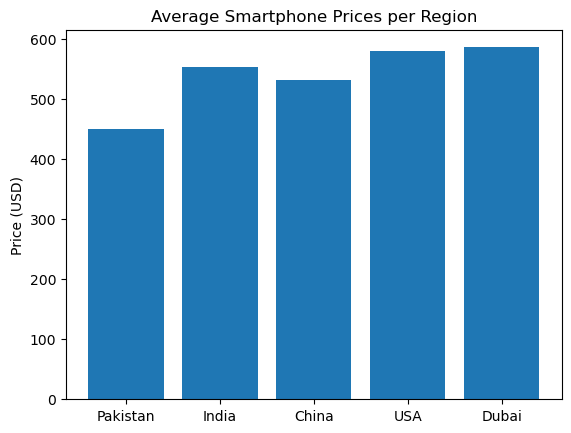

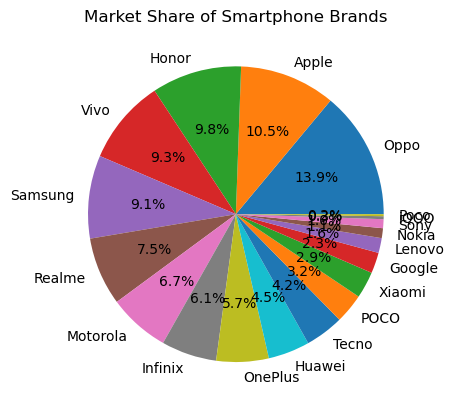

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, f_oneway

# Load the dataset
df = pd.read_csv("mobiles_dataset.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Exchange rates
df["Price_USD"] = (
    df["Launched.Price.Pakistan.PKR"] * 0.0036 +
    df["Launched.Price.India.INR"] * 0.011 +
    df["Launched.Price.China.CNY"] * 0.14 +
    df["Launched.Price.USA.USD"] +
    df["Launched.Price.Dubai.AED"] * 0.27
) / 5

# 1. Does battery capacity influence price?
sns.scatterplot(x=df["Battery.Capacity.mAh"], y=df["Price_USD"])
plt.title("Battery Capacity vs Price")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Price (USD)")
plt.show()

corr, _ = pearsonr(df["Battery.Capacity.mAh"], df["Price_USD"])
print(f"Correlation: {corr:.2f}")

# 2. Does RAM size impact price?
sns.boxplot(x=df["RAM"], y=df["Price_USD"])
plt.title("RAM vs Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (USD)")
plt.show()

ram_groups = [df[df["RAM"] == ram]["Price_USD"] for ram in df["RAM"].unique()]
stat, p = f_oneway(*ram_groups)
print(f"ANOVA test: p-value = {p:.4f}")

# 3. Apple price variation across regions
df_apple = df[df["Company.Name"] == "Apple"]
apple_std = df_apple[["Launched.Price.Pakistan.PKR", "Launched.Price.India.INR",
                      "Launched.Price.China.CNY", "Launched.Price.USA.USD",
                      "Launched.Price.Dubai.AED"]].std()
print("Apple price variation:")
print(apple_std)

# 4. Budget, Mid-range, Premium classification
def price_category(price):
    if price < 300:
        return "Budget"
    elif 300 <= price < 700:
        return "Mid-range"
    else:
        return "Premium"

df["Category"] = df["Price_USD"].apply(price_category)
category_counts = df.groupby("Company.Name")["Category"].value_counts().unstack()
print(category_counts)

# 5. Most affordable region
# Part2: Bar chart for average price per region in USD
region_avg_prices = {
    "Pakistan": df["Launched.Price.Pakistan.PKR"].mean() * 0.0036,
    "India": df["Launched.Price.India.INR"].mean() * 0.011,
    "China": df["Launched.Price.China.CNY"].mean() * 0.14,
    "USA": df["Launched.Price.USA.USD"].mean(),
    "Dubai": df["Launched.Price.Dubai.AED"].mean() * 0.27
}
plt.bar(region_avg_prices.keys(), region_avg_prices.values())
plt.title("Average Smartphone Prices per Region")
plt.ylabel("Price (USD)")
plt.show()

# Part 2: Market share pie chart 
brand_counts = df["Company.Name"].value_counts()
plt.pie(brand_counts, labels=brand_counts.index, autopct="%1.1f%%")
plt.title("Market Share of Smartphone Brands")
plt.show()